In [19]:
import polars as pl
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

In [20]:
# file path
file_path = "~/buckets/b1/exp/HT4220D/HT4220D.txt"

In [21]:
# load data
df = pl.read_csv(file_path, separator='\t', ignore_errors=True)
df.head()

fecha,objective,metric,first_metric_only,boost_from_average,feature_pre_filter,verbosity,max_bin,num_iterations,force_row_wise,seed,learning_rate,num_leaves,feature_fraction,min_data_in_leaf,bagging_fraction,bagging_freq,lambda_l1,lambda_l2,envios,ganancia,iteracion
str,str,str,bool,bool,bool,i64,i64,i64,bool,i64,f64,i64,f64,i64,f64,i64,f64,f64,i64,i64,i64
"""20240923 145403""","""binary""","""custom""",true,true,false,-100,31,71,true,173249,0.176292,1179,0.817631,5196,0.742266,40,51.866456,48.999191,10488,55065000,1
"""20240923 145421""","""binary""","""custom""",true,true,false,-100,31,22,true,173249,0.085849,1121,0.825634,7536,0.801205,24,78.647178,42.692531,7927,51705000,2
"""20240923 145443""","""binary""","""custom""",true,true,false,-100,31,121,true,173249,0.234583,2184,0.623822,6003,0.766027,30,28.073377,55.018186,9917,54855000,3
"""20240923 145519""","""binary""","""custom""",true,true,false,-100,31,115,true,173249,0.075956,132,0.585832,1081,0.902643,25,63.55903,83.923986,9673,54870000,4
"""20240923 145636""","""binary""","""custom""",true,true,false,-100,31,356,true,173249,0.021618,1456,0.62791,6604,0.706525,22,42.493406,69.226612,13145,54885000,5


In [22]:
# convert 'fecha' to datetime
df = df.with_columns(pl.col('fecha').str.strptime(pl.Datetime, "%Y%m%d %H%M%S"))
df.head()

fecha,objective,metric,first_metric_only,boost_from_average,feature_pre_filter,verbosity,max_bin,num_iterations,force_row_wise,seed,learning_rate,num_leaves,feature_fraction,min_data_in_leaf,bagging_fraction,bagging_freq,lambda_l1,lambda_l2,envios,ganancia,iteracion
datetime[μs],str,str,bool,bool,bool,i64,i64,i64,bool,i64,f64,i64,f64,i64,f64,i64,f64,f64,i64,i64,i64
2024-09-23 14:54:03,"""binary""","""custom""",true,true,false,-100,31,71,true,173249,0.176292,1179,0.817631,5196,0.742266,40,51.866456,48.999191,10488,55065000,1
2024-09-23 14:54:21,"""binary""","""custom""",true,true,false,-100,31,22,true,173249,0.085849,1121,0.825634,7536,0.801205,24,78.647178,42.692531,7927,51705000,2
2024-09-23 14:54:43,"""binary""","""custom""",true,true,false,-100,31,121,true,173249,0.234583,2184,0.623822,6003,0.766027,30,28.073377,55.018186,9917,54855000,3
2024-09-23 14:55:19,"""binary""","""custom""",true,true,false,-100,31,115,true,173249,0.075956,132,0.585832,1081,0.902643,25,63.55903,83.923986,9673,54870000,4
2024-09-23 14:56:36,"""binary""","""custom""",true,true,false,-100,31,356,true,173249,0.021618,1456,0.62791,6604,0.706525,22,42.493406,69.226612,13145,54885000,5


In [23]:
# calculate runtime
runtime = round((df['fecha'].max() - df['fecha'].min()).total_seconds()/60/60,2)
runtime

2.29

In [24]:
# sort by 'ganancia' in descending order
df_sorted = df.sort('ganancia', descending=True).filter(pl.col('ganancia').is_not_null())
df_sorted.head()

fecha,objective,metric,first_metric_only,boost_from_average,feature_pre_filter,verbosity,max_bin,num_iterations,force_row_wise,seed,learning_rate,num_leaves,feature_fraction,min_data_in_leaf,bagging_fraction,bagging_freq,lambda_l1,lambda_l2,envios,ganancia,iteracion
datetime[μs],str,str,bool,bool,bool,i64,i64,i64,bool,i64,f64,i64,f64,i64,f64,i64,f64,f64,i64,i64,i64
2024-09-23 15:53:48,"""binary""","""custom""",true,true,false,-100,31,366,true,173249,0.065087,862,0.839746,41,0.998503,11,1.51801,69.244345,11125,63465000,45
2024-09-23 15:21:46,"""binary""","""custom""",true,true,false,-100,31,649,true,173249,0.029398,1072,0.785773,70,0.966146,9,0.073559,53.825031,10840,63120000,40
2024-09-23 15:50:52,"""binary""","""custom""",true,true,false,-100,31,840,true,173249,0.029092,878,0.956323,31,0.996282,7,3.916035,64.917742,11020,62940000,44
2024-09-23 15:45:12,"""binary""","""custom""",true,true,false,-100,31,1530,true,173249,0.013298,871,0.870667,103,0.973307,9,0.068481,91.931766,11001,62880000,43
2024-09-23 16:56:27,"""binary""","""custom""",true,true,false,-100,31,315,true,173249,0.071888,2982,0.512034,296,0.998691,9,0.353803,91.071828,11212,62490000,63


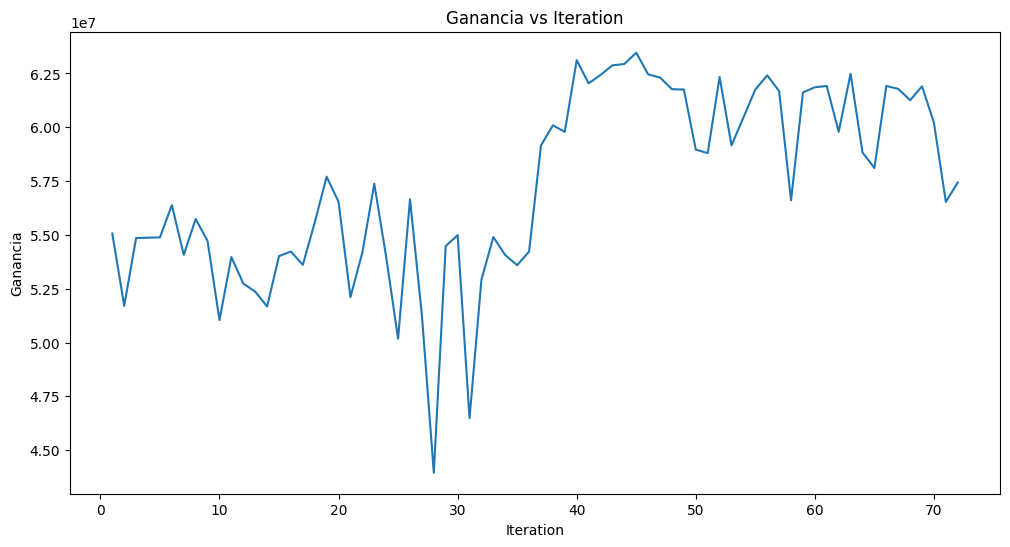

In [25]:
# plot
plt.figure(figsize=(12, 6))
sns.lineplot(x=df['iteracion'], y=df['ganancia'])
plt.title('Ganancia vs Iteration')
plt.xlabel('Iteration')
plt.ylabel('Ganancia')
plt.show()

In [26]:
# Find the row with the best ganancia
best_params = df_sorted.head(1).tail(1)
best_params

fecha,objective,metric,first_metric_only,boost_from_average,feature_pre_filter,verbosity,max_bin,num_iterations,force_row_wise,seed,learning_rate,num_leaves,feature_fraction,min_data_in_leaf,bagging_fraction,bagging_freq,lambda_l1,lambda_l2,envios,ganancia,iteracion
datetime[μs],str,str,bool,bool,bool,i64,i64,i64,bool,i64,f64,i64,f64,i64,f64,i64,f64,f64,i64,i64,i64
2024-09-23 15:53:48,"""binary""","""custom""",true,true,false,-100,31,366,true,173249,0.065087,862,0.839746,41,0.998503,11,1.51801,69.244345,11125,63465000,45


In [27]:
# List of all parameters we searched through
params = [
    'learning_rate', 'num_leaves', 'feature_fraction', 'min_data_in_leaf',
    'envios', 'bagging_fraction', 'bagging_freq', 'lambda_l1', 'lambda_l2'
]

# Generate R code for the best parameters
r_code = "# Best hyperparameters\n"
for param in params:
    if param in best_params.columns:
        value = best_params[param][0]
        if isinstance(value, float):
            r_code += f"PARAM$finalmodel${param} <- {value:.6f}\n"
        else:
            r_code += f"PARAM$finalmodel${param} <- {value}\n"
    else:
        r_code += f"# Warning: {param} not found in the results\n"

print(r_code)

# Best hyperparameters
PARAM$finalmodel$learning_rate <- 0.065087
PARAM$finalmodel$num_leaves <- 862
PARAM$finalmodel$feature_fraction <- 0.839746
PARAM$finalmodel$min_data_in_leaf <- 41
PARAM$finalmodel$envios <- 11125
PARAM$finalmodel$bagging_fraction <- 0.998503
PARAM$finalmodel$bagging_freq <- 11
PARAM$finalmodel$lambda_l1 <- 1.518010
PARAM$finalmodel$lambda_l2 <- 69.244345

